In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/Balamurugan2007/FOML/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'

In [4]:
data = pd.read_csv(url)

In [5]:
print("First 5 rows of dataset:")
print(data.head(), "\n")


First 5 rows of dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Publ

In [6]:
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']


In [7]:
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}\n")


Confusion Matrix:
 [[86  0  0  0  0  0  0]
 [12 76  0  0  0  5  0]
 [ 0  0 97  3  0  0  2]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  1  0  0  0 84  3]
 [ 0  0  1  0  0  5 73]]
Accuracy: 0.9479
Precision: 0.9511
Recall: 0.9479
F1-Score: 0.9475



In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
metrics = {'Kernel': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


In [11]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [14]:

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    metrics['Kernel'].append(kernel)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

results_df = pd.DataFrame(metrics)
print("Performance for different kernels:\n", results_df)

Performance for different kernels:
     Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.947950   0.951055  0.947950  0.947511
1     poly  0.802839   0.800621  0.802839  0.796315
2      rbf  0.872240   0.876527  0.872240  0.872505
3  sigmoid  0.611987   0.616135  0.611987  0.613224


/tmp/ipython-input-164036783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kernel', y='Accuracy', data=results_df, palette='viridis')


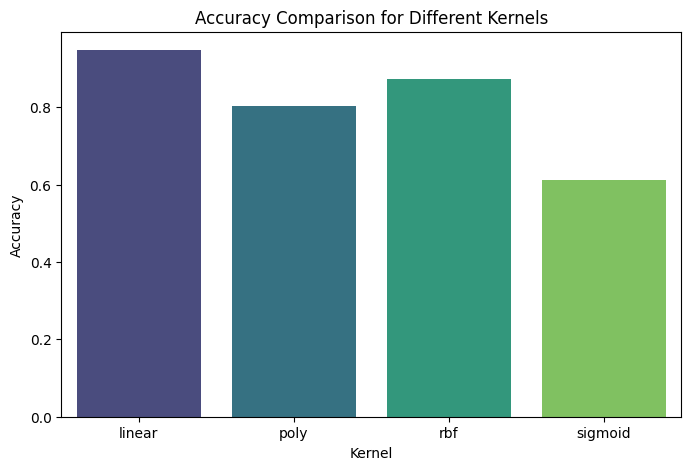

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Kernel', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy Comparison for Different Kernels')
plt.show()


In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {'Kernel': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


In [17]:
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1.0, gamma='scale')

    acc = cross_val_score(svm, X, y, cv=kf, scoring='accuracy').mean()
    prec = cross_val_score(svm, X, y, cv=kf, scoring='precision_weighted').mean()
    rec = cross_val_score(svm, X, y, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(svm, X, y, cv=kf, scoring='f1_weighted').mean()

    cv_metrics['Kernel'].append(kernel)
    cv_metrics['Accuracy'].append(acc)
    cv_metrics['Precision'].append(prec)
    cv_metrics['Recall'].append(rec)
    cv_metrics['F1-Score'].append(f1)

cv_df = pd.DataFrame(cv_metrics)
print("\n5-Fold Cross Validation Results:\n", cv_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


5-Fold Cross Validation Results:
     Kernel  Accuracy  Precision    Recall  F1-Score
0   linear  0.878727   0.881043  0.878727  0.876504
1     poly  0.597359   0.609652  0.597359  0.586548
2      rbf  0.560870   0.578349  0.560870  0.550577
3  sigmoid  0.030315   0.098464  0.030315  0.016360


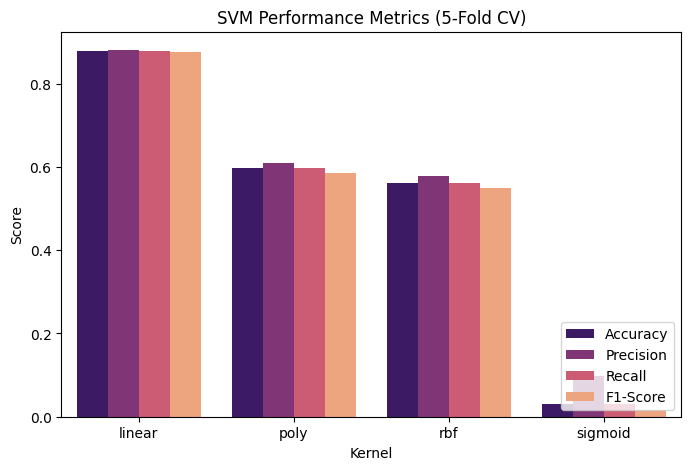

In [18]:
plt.figure(figsize=(8, 5))
cv_df_melted = cv_df.melt(id_vars='Kernel', var_name='Metric', value_name='Score')
sns.barplot(x='Kernel', y='Score', hue='Metric', data=cv_df_melted, palette='magma')
plt.title('SVM Performance Metrics (5-Fold CV)')
plt.legend(loc='lower right')
plt.show()


In [19]:
print("\nIndices of first 5 support vectors for RBF kernel:")
print(model.support_[:5])


Indices of first 5 support vectors for RBF kernel:
[ 19  40 114 127 169]
